<a href="https://colab.research.google.com/github/reshalfahsi/neuralnetwork/blob/main/notebook/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Package**

In [ ]:
!git clone -q https://github.com/reshalfahsi/neuralnetwork
%cd neuralnetwork
!pip install -q .

/content/neuralnetwork
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 87 kB 3.4 MB/s 


## **Hyperparameters**

In [ ]:
NUM_EPOCHS = 32
BATCH_SIZE = 16
lr = 1e-2

## **Dataset Preparation**

This tutorial will use a toy dataset from [MedMNIST](https://medmnist.com/). We use PneumoniaMNIST, which contains 2D X-ray image-label pairs for distinguishing between Pneumonia-infected and healthy lungs. The pneumonia-infected lung is denoted by the label `1` whilst the healthy lung is labeled as `0`.

In [ ]:
from neuralnetwork.ds.medmnist import PneumoniaMNIST
from neuralnetwork import ds
import numpy as np


train_dataset = PneumoniaMNIST(split='train', download=True)
test_dataset = PneumoniaMNIST(split='test', download=True)

print("Train Dataset:", len(train_dataset))
print("Test Dataset", len(test_dataset))

  0%|          | 0/4170669 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Train Dataset: 4708
Test Dataset 624


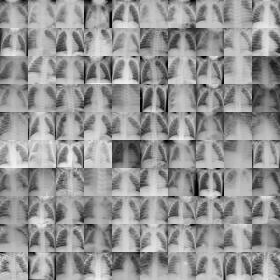

In [ ]:
train_dataset.montage(length=10)

## **Neural Network**

The artificial neural network is a bio-inspired machine learning method that models neuronal signal propagation by matrix multiplication. Here we have two kinds of neuronal signal propagation: forward propagation and backward propagation. In forward propagation, the neuron actively conveys information from the "receptor" (or input) to the "central nervous system" (or output). Backward propagation or backpropagation, in short, is utilized in the training or learning process. In the learning process, the neural network transmits error gradients from the "central nervous system" to the "receptor". For further knowledge about the learning process, read more: [Calculus on Computational Graphs: Backpropagation](https://colah.github.io/posts/2015-08-Backprop/) and [Backpropagation for a Linear Layer
](https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html).

In [ ]:
import neuralnetwork.nn as nn


class NeuralNetwork(nn.Module):
    def __init__(self, **kwargs):
        super(NeuralNetwork, self).__init__(**kwargs)
        self.linear0 = nn.Linear(784, 200, **kwargs)
        self.linear1 = nn.Linear(200, 200, **kwargs)
        self.linear2 = nn.Linear(200, 1, **kwargs)

        self.activation = nn.Sigmoid()

    def forward(self, x):
        self.out0 = self.linear0(x)
        self.out1 = self.activation(self.out0)
        self.out2 = self.linear1(self.out1)
        self.out3 = self.activation(self.out2)
        self.out4 = self.linear2(self.out3)
        self.out5 = self.activation(self.out4)

        return self.out5
    
    def backward(self, lr, criterion, method=None):
                                                               # Computational Graph
                                                               #
        self.dx0 = criterion.grad()                            # loss_grad(pred, y)
                                                               #        |
        self.dx1 = self.sigmoid.grad(self.out4)                # sigmoid_grad(pred)
                                                               #        |
                                                               #        +
                                                               #       / \
                                                               #      |   |
                                                               #  b_grad  *
                                                               #         / \
                                                               #        |   |
        self.dx2 = self.linear2.grad(self.dx1 * self.dx0)      #   A_grad   x_grad
                                                               #          .
        self.dx3 = self.sigmoid.grad(self.out2)                #          .
        self.dx4 = self.linear1.grad(self.dx3 * self.dx2)      #          .

        self.dx5 = self.sigmoid.grad(self.out0)
        self.dx6 = self.linear0.grad(self.dx5 * self.dx4)

        if method == 'newton':
            self.d2x0 = criterion.grad('hessian')                                                        
            self.d2x1 = self.sigmoid.grad(self.out4, 'hessian')

            gradient = {
                'error_first': self.dx0,
                'error_second': self.d2x0,
                'nonlinearity_first': self.dx1,
                'nonlinearity_second': self.d2x1,
            }               

            self.d2x2 = self.linear2.grad(gradient, 'hessian')
            self.d2x3 = self.sigmoid.grad(self.out2, 'hessian') 

            gradient = {
                'error_first': self.dx2,
                'error_second': self.d2x2,
                'nonlinearity_first': self.dx3,
                'nonlinearity_second': self.d2x3,
            }         
                                                                            
            self.d2x4 = self.linear1.grad(gradient, 'hessian')
            self.d2x5 = self.sigmoid.grad(self.out0, 'hessian')

            gradient = {
                'error_first': self.dx4,
                'error_second': self.d2x4,
                'nonlinearity_first': self.dx5,
                'nonlinearity_second': self.d2x5,
            } 

            self.d2x6 = self.linear0.grad(gradient, 'hessian')

        self.linear0.update(lr, method)
        self.linear1.update(lr, method)
        self.linear2.update(lr, method)

## **Training**

In [ ]:
import time
import matplotlib.pyplot as plt


def accuracy(model, X, Y):
    pred = model(X)
    pred = pred > 0.5
    acc = np.sum(pred == Y)
    acc = acc / Y.shape[0]
    return acc

seed = np.random.randint(2147483647)
print(seed)

633030033


### **Gradient Descent**

Size 4708
1/294 - The training loss at 1th epoch : 0.36836454840484234  Training Accuracy:0.5625
21/294 - The training loss at 1th epoch : 0.2692503306927377  Training Accuracy:0.7113095238095238
41/294 - The training loss at 1th epoch : 0.24741028530297093  Training Accuracy:0.7332317073170732
61/294 - The training loss at 1th epoch : 0.2450293698677531  Training Accuracy:0.7346311475409836
81/294 - The training loss at 1th epoch : 0.2494429012618718  Training Accuracy:0.7253086419753086
101/294 - The training loss at 1th epoch : 0.2350137341499734  Training Accuracy:0.7419554455445545
121/294 - The training loss at 1th epoch : 0.23062864482136852  Training Accuracy:0.7458677685950413
141/294 - The training loss at 1th epoch : 0.22803319879623057  Training Accuracy:0.7437943262411347
161/294 - The training loss at 1th epoch : 0.22453490223547554  Training Accuracy:0.7441770186335404
181/294 - The training loss at 1th epoch : 0.2209560115643897  Training Accuracy:0.7455110497237569
201

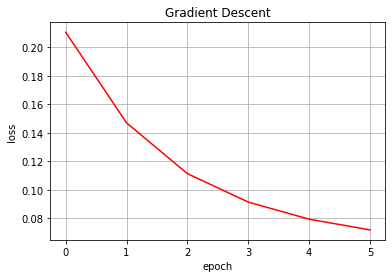

<Figure size 432x288 with 0 Axes>

In [ ]:
train_loader = ds.get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = ds.get_loader(dataset=test_dataset, batch_size=1)

criterion = nn.BCELoss()
np.random.seed(seed)
model = NeuralNetwork()

loss_train = list()


start = time.perf_counter()
for epoch in range(NUM_EPOCHS):
    loss = list()
    acc = list()
    for idx, pack in enumerate(train_loader):
        x, y = pack
        bs = x.shape[0]
        L = x.shape[1] * x.shape[2]
        x = x.reshape(bs, 1, L) / 255.0
        y = y.reshape(bs, 1, 1)
        pred = model(x)
        loss.append(criterion(pred, y))
        model.backward(lr, criterion)
        acc.append(accuracy(model, x, y))
        if idx % 20 == 0 or idx == len(train_dataset) - 1:
            print(
                "{}/{} - The training loss at {}th epoch : {}  Training Accuracy:{}".format(
                    idx + 1,
                    len(train_dataset) // BATCH_SIZE,
                    epoch + 1,
                    np.array(loss).mean(),
                    np.array(acc).mean(),
                ),
            )
        if idx >= int(len(train_dataset) / BATCH_SIZE) - 1:
            break

    loss_train.append(np.array(loss).mean())

    if np.array(acc).mean() > 0.9:
        break
    print("-----------------------------------------------------------")
end = time.perf_counter()

print(f"Training finished in {epoch + 1} epochs and {end - start:0.4f} seconds")

plt.title("Gradient Descent")
plt.plot(loss_train, color = 'r')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.clf()

### **Newton Method**

Size 4708
1/294 - The training loss at 1th epoch : 0.12281128304030925  Training Accuracy:0.875


/content/neuralnetwork/neuralnetwork/nn/activation.py:24: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-input))


21/294 - The training loss at 1th epoch : 0.24989577538287186  Training Accuracy:0.75
41/294 - The training loss at 1th epoch : 0.26214173861073925  Training Accuracy:0.7378048780487805
61/294 - The training loss at 1th epoch : 0.263283791525251  Training Accuracy:0.7366803278688525
81/294 - The training loss at 1th epoch : 0.2654050775683989  Training Accuracy:0.7345679012345679
101/294 - The training loss at 1th epoch : 0.2666862503271318  Training Accuracy:0.7332920792079208
121/294 - The training loss at 1th epoch : 0.26341166349620093  Training Accuracy:0.7365702479338843
141/294 - The training loss at 1th epoch : 0.2623958247024135  Training Accuracy:0.7375886524822695
161/294 - The training loss at 1th epoch : 0.26007957318658576  Training Accuracy:0.7399068322981367
181/294 - The training loss at 1th epoch : 0.25516746565215637  Training Accuracy:0.7448204419889503
201/294 - The training loss at 1th epoch : 0.25558612578627016  Training Accuracy:0.7444029850746269
221/294 - The

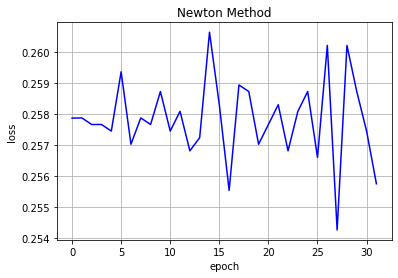

<Figure size 432x288 with 0 Axes>

In [ ]:
train_loader = ds.get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = ds.get_loader(dataset=test_dataset, batch_size=1)

criterion = nn.BCELoss()
np.random.seed(seed)
model = NeuralNetwork()

loss_train = list()


start = time.perf_counter()
for epoch in range(NUM_EPOCHS):
    loss = list()
    acc = list()
    for idx, pack in enumerate(train_loader):
        x, y = pack
        bs = x.shape[0]
        L = x.shape[1] * x.shape[2]
        x = x.reshape(bs, 1, L) / 255.0
        y = y.reshape(bs, 1, 1)
        pred = model(x)
        loss.append(criterion(pred, y))
        model.backward(lr, criterion, 'newton')
        acc.append(accuracy(model, x, y))
        if idx % 20 == 0 or idx == len(train_dataset) - 1:
            print(
                "{}/{} - The training loss at {}th epoch : {}  Training Accuracy:{}".format(
                    idx + 1,
                    len(train_dataset) // BATCH_SIZE,
                    epoch + 1,
                    np.array(loss).mean(),
                    np.array(acc).mean(),
                ),
            )
        if idx >= int(len(train_dataset) / BATCH_SIZE) - 1:
            break

    loss_train.append(np.array(loss).mean())

    if np.array(acc).mean() > 0.9:
        break
    print("-----------------------------------------------------------")
end = time.perf_counter()

print(f"Training finished in {epoch + 1} epochs and {end - start:0.4f} seconds")

plt.title("Newton Method")
plt.plot(loss_train, color = 'b')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.clf()

## **Testing**

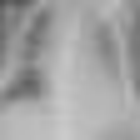

Prediction: Pneumonia
Ground Truth: Pneumonia


In [ ]:
import random
from IPython.display import display

index = random.randint(0, len(test_dataset))

x, y = test_dataset[index]
display(x.resize((140, 140)))
x = np.array(x)
L = x.shape[0] * x.shape[1]
x = x.reshape(1, 1, L)/255.
pred = model(x)

pred = pred.squeeze(0).squeeze(0)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
print("Prediction: Pneumonia" if pred[0] else "Prediction: Healthy")
print("Ground Truth: Pneumonia" if y[0] else "Ground Truth: Healthy")